In [11]:
import numpy as np
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
d1 = pd.read_csv('datasets/MotionAlerts_02-24-2020_No.csv')
d2 = pd.read_csv('datasets/MotionAlerts_02-24-2020_Yes.csv')

In [7]:
d1 = d1.drop('SimulationType', axis=1)
d1 = d1.drop('Orientation', axis=1)
d1 = d1.drop('Reason', axis=1)

In [8]:
d2 = d2.drop('SimulationType', axis=1)
d2 = d2.drop('Orientation', axis=1)
d2 = d2.drop('Reason', axis=1)

In [10]:
d1

,Time,TimeStamp,Current Pitch Value,Current Roll Value,Current Yaw Value,Acceleration X-axis,Acceleration Y-axis,Acceleration Z-axis,Complete Acceleration,Alert Generated (Y/N)
0,0.0,1582570578,78.641152,-2.837347,2.324200,7.850000e-07,1.060000e-05,2.877230e-04,0.017295,No
1,0.2,1582570578,79.644855,-5.385776,5.247798,1.730000e-05,2.708810e-04,4.149490e-04,0.026516,No
2,0.4,1582570578,79.838601,-5.528922,5.805133,1.230635e-03,6.299680e-04,2.441030e-04,0.045877,No
3,0.6,1582570578,79.778690,-7.446909,8.077598,1.490640e-03,1.454082e-03,2.386049e-03,0.073012,No
4,0.8,1582570578,79.888923,-7.504131,8.563617,1.029293e-03,4.321540e-04,1.347210e-03,0.052997,No
5,1.0,1582570579,79.715184,-6.927743,8.556805,1.303161e-02,5.760000e-06,4.484708e-03,0.132371,No
6,1.2,1582570579,79.769513,-7.266570,9.468404,9.768170e-04,1.605079e-03,1.224010e-04,0.052003,No
7,1.4,1582570579,79.841431,-7.244500,10.050116,9.340000e-05,2.020691e-03,1.428715e-03,0.059522,No
8,1.6,1582570579,79.754308,-6.161206,9.655650,1.146551e-03,1.613415e-03,3.964020e-04,0.056182,No
9,1.8,1582570579,79.787161,-5.902905,10.058004,2.420034e-03,9.395410e-04,6.854340e-04,0.063600,No


In [12]:
d1.shape

(4516, 10)

In [13]:
d2.shape

(4502, 10)

In [14]:
set_option('precision', 3)
print(d1.describe())

          Time  TimeStamp  Current Pitch Value  Current Roll Value  \
count  4516.00  4.516e+03             4516.000            4516.000   
mean    451.50  1.583e+09               82.958             -21.651   
std     260.76  2.644e+02                2.407              10.644   
min       0.00  1.583e+09               71.703             -68.787   
25%     225.75  1.583e+09               81.928             -26.152   
50%     451.50  1.583e+09               83.539             -22.855   
75%     677.25  1.583e+09               84.629             -16.330   
max     903.00  1.583e+09               89.074              75.136   

       Current Yaw Value  Acceleration X-axis  Acceleration Y-axis  \
count           4516.000            4.516e+03            4.516e+03   
mean             -16.917            4.134e-03            3.276e-03   
std              109.429            1.635e-02            6.137e-03   
min             -179.764            3.550e-13            1.280e-13   
25%             -12

In [15]:
set_option('precision', 3)
print(d2.describe())

           Time  TimeStamp  Current Pitch Value  Current Roll Value  \
count  4502.000  4.502e+03             4502.000            4502.000   
mean    450.100  1.583e+09               76.817             -31.393   
std     259.952  2.601e+02               11.784              58.737   
min       0.000  1.583e+09               16.919            -179.566   
25%     225.050  1.583e+09               73.316             -68.564   
50%     450.100  1.583e+09               81.271             -29.432   
75%     675.150  1.583e+09               84.603              -5.196   
max     900.200  1.583e+09               89.325             178.219   

       Current Yaw Value  Acceleration X-axis  Acceleration Y-axis  \
count           4502.000            4.502e+03            4.502e+03   
mean              -1.050            1.332e-02            1.034e-02   
std              115.952            5.926e-02            5.746e-02   
min             -179.975            2.570e-13            2.400e-12   
25%       

In [19]:
data = pd.concat([d1, d2])

In [21]:
data.shape

(9018, 10)

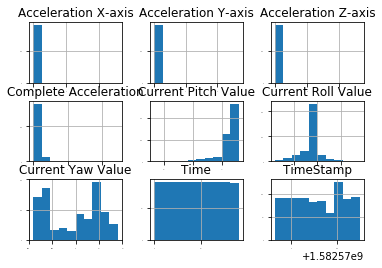

In [25]:
#Unimodal Data Visualizations
data.hist(sharex = False, sharey = False, xlabelsize = 1, ylabelsize = 1)
plt.show()

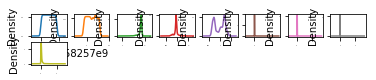

In [26]:
#density plots
data.plot(kind = 'density', subplots=True, layout=(8,8), sharex = False, legend= False, fontsize = 1)
plt.show()

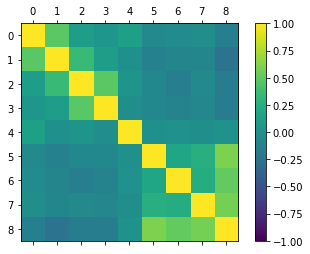

In [27]:
#Multimodal data visualization
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin = -1, vmax = 1, interpolation = 'none')
fig.colorbar(cax)
plt.show()

In [34]:
le = LabelEncoder()
le.fit(data['Alert Generated (Y/N)'])
data['Alert Generated (Y/N)'] = le.transform(data['Alert Generated (Y/N)'])

In [38]:
data.head(7)
Y = data['Alert Generated (Y/N)']
X = data.drop('Alert Generated (Y/N)', axis = 1)

In [39]:
# array = data.values

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [40]:
num_folds = 10
seed = 7
scoring = 'accuracy'

In [41]:
#Spot Check 
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [42]:
# evaluate each model in turn 
results = [] 
names = [] 
for name, model in models: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-pa

LR: 0.489333 (0.015094)
LDA: 1.000000 (0.000000)
KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 0.879678 (0.011536)


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarn

SVM: 0.753114 (0.018646)


In [43]:
#Boosting
#Bagging

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []

for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

AB: 1.000000 (0.000000)
GBM: 1.000000 (0.000000)


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

RF: 1.000000 (0.000000)


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

ET: 1.000000 (0.000000)


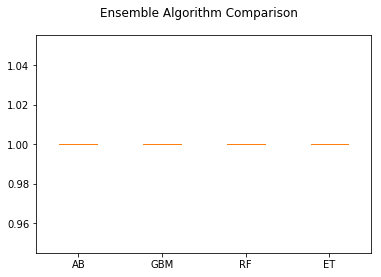

In [44]:
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [45]:
#Finalize Model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C = 1.5)
model.fit(rescaledX, Y_train)

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9988913525498891
[[924   2]
 [  0 878]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       926
           1       1.00      1.00      1.00       878

    accuracy                           1.00      1804
   macro avg       1.00      1.00      1.00      1804
weighted avg       1.00      1.00      1.00      1804

